In [1]:
import geopandas as gpd
import pysal as ps
import matplotlib.pyplot as plt

In [2]:
# import data into geopandas GeoDataFrame
ri_data = gpd.read_file("./source-data/census2010/censusSF1_2010/censusSF1_2010.shp")
# extract newport data
newport_data = ri_data[ri_data['RIMUNI10'] == 'Newport city']

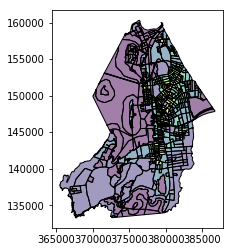

In [3]:
# show basic housing unit density
hu_density = newport_data[['HU1', 'ALAND10', 'geometry']]
hu_density['density'] = hu_density.HU1 / hu_density.ALAND10
max_dens = hu_density.density.max()
# normalize density for plotting
hu_density['density'] = hu_density.density / hu_density.density.max()
hu_density.plot(column='density', scheme='QUANTILES', k=9)
plt.show()